In [35]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt

In [73]:
# Function to calculate cumulative debt and revenue over time
def calculate_cumulative_debt_and_revenue(nightly_rate, months):
    cumulative_debt = []
    cumulative_revenue = []
    total_debt = renovation_cost
    total_revenue = 0
    monthly_revenue = (nightly_rate * 30 * occupancy_rate) * (1 - airbnb_fee_percent)
    all_month = []
    all_revenue = []
    for month in range(months):
        
        total_revenue = total_revenue + monthly_revenue
        total_debt = total_debt + mortgage_payment - total_revenue
        total_net_revenue = total_revenue - total_debt
        
        cumulative_debt.append(total_debt)
        cumulative_revenue.append(total_revenue)
        all_month.append(month)
        all_revenue.append(total_net_revenue)
        
    return pd.DataFrame({'months': all_month,
                         'cumulative_debt':cumulative_debt, 
                         'cumulative_revenue':cumulative_revenue,
                         'total_net_revenue':all_revenue}
                       )



import pandas as pd
import matplotlib.pyplot as plt

def calculate_cumulative_debt_and_revenue(nightly_rate, months, renovation_cost, mortgage_payment, occupancy_rate, airbnb_fee_percent):
    cumulative_debt = []
    cumulative_revenue = []
    all_month = []
    all_revenue = []

    total_debt = -1*renovation_cost
    total_revenue = 0
    monthly_revenue = (nightly_rate * 30 * occupancy_rate) * (1 - airbnb_fee_percent)

    for month in range(1, months + 1):
        total_revenue = total_revenue + monthly_revenue
        total_debt = total_revenue + total_debt -mortgage_payment
        
        cumulative_debt.append(total_debt)
        cumulative_revenue.append(total_revenue)
        all_month.append(month)
        all_revenue.append(total_net_revenue)

    return pd.DataFrame({
        'months': all_month,
                         'cumulative_debt': cumulative_debt,
                         'revenue' : monthly_revenue,
                         # 'cumulative_revenue': cumulative_revenue,
                         'total_net_revenue': all_revenue
                        })



In [74]:
setting = dict(
    nightly_rate = 50,
months=5,
renovation_cost = 3_000,
occupancy_rate = 0.6,
airbnb_fee_percent = 0.15,
mortgage_payment =1_000

)



data = calculate_cumulative_debt_and_revenue(**setting)

display(data)

,months,cumulative_debt,revenue,total_net_revenue
0,1,-3235.0,765.0,-2470.0
1,2,-2705.0,765.0,-1175.0
2,3,-1410.0,765.0,885.0
3,4,650.0,765.0,3710.0
4,5,3475.0,765.0,7300.0


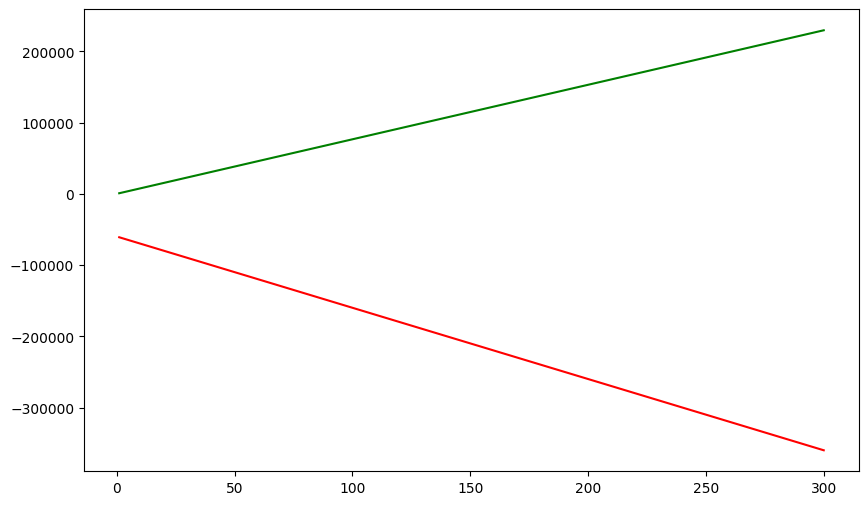

In [42]:

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(data['months'], -1*data['cumulative_debt'], label='Cumulative Debt', color='red')
plt.plot(data['months'], data['cumulative_revenue'], label='Cumulative Revenue', color='green')


plt.show()

In [16]:
def plot_cumulative_debt_and_revenue(years):
    months = years * 12  # total number of months in the horizon
    nightly_rates = np.linspace(50, 200, 10)

    fig, ax1 = plt.subplots(figsize=(12, 8))

    for rate in nightly_rates:
        debt_over_time, revenue_over_time = calculate_cumulative_debt_and_revenue(rate, months)
        ax1.plot(range(months), debt_over_time, label=f'Nightly Rate: ${rate:.2f}')

    ax1.set_xlabel('Months')
    ax1.set_ylabel('Cumulative Debt ($)', color='tab:blue')
    ax1.set_title(f'Impact of Nightly Rate on Debt and Revenue over {years} Years')
    ax1.axhline(0, color='gray', linestyle='--')
    ax1.legend(loc='upper left')
    ax1.grid(True)

    ax2 = ax1.twinx()  # instantiate a second y-axis sharing the same x-axis
    ax2.set_ylabel('Cumulative Revenue ($)', color='tab:red')
    for rate in nightly_rates:
        _, revenue_over_time = calculate_cumulative_debt_and_revenue(rate, months)
        ax2.plot(range(months), revenue_over_time, linestyle='dashed', label=f'Revenue: ${rate:.2f}')

    fig.tight_layout()  # to avoid overlapping of labels
    plt.show()

     Month  Current Profit  Cumulative Revenue  Updated Debt  nightly_rate
0        1           800.0              1800.0      -19200.0           100
1        2           800.0              3600.0      -18400.0           100
2        3           800.0              5400.0      -17600.0           100
3        4           800.0              7200.0      -16800.0           100
4        5           800.0              9000.0      -16000.0           100
..     ...             ...                 ...           ...           ...
295    296           800.0            532800.0      216800.0           100
296    297           800.0            534600.0      217600.0           100
297    298           800.0            536400.0      218400.0           100
298    299           800.0            538200.0      219200.0           100
299    300           800.0            540000.0      220000.0           100

[300 rows x 5 columns]


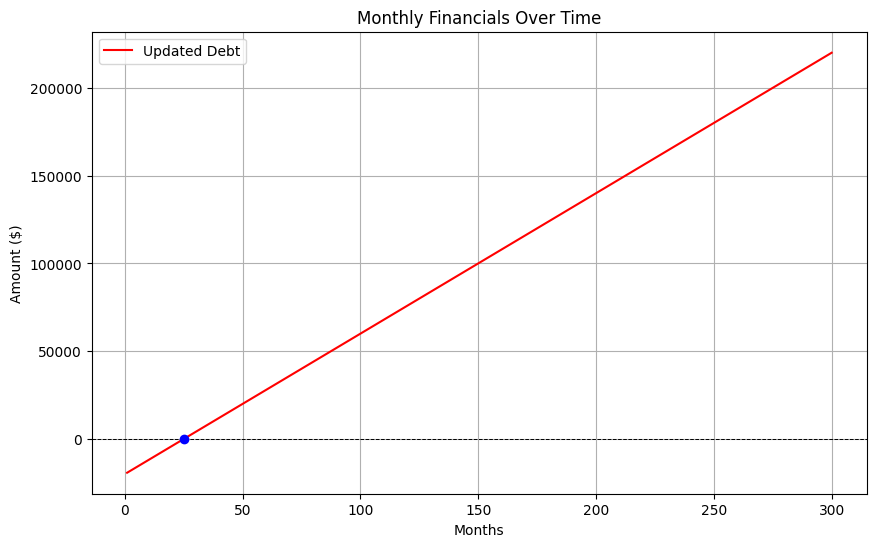

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

def calculate_monthly_financials(nightly_rate, months, renovation_cost, mortgage_payment, occupancy_rate, airbnb_fee_percent):
    monthly_financials = {
        'Month': [],
        'Current Profit': [],
        'Cumulative Revenue': [],
        'Updated Debt': [],
        'nightly_rate':[]
    }

    total_debt = renovation_cost
    total_revenue = 0
    monthly_revenue = (nightly_rate * 30 * occupancy_rate) * (1 - airbnb_fee_percent)

    for month in range(1, months + 1):
        total_revenue += monthly_revenue
        current_profit = monthly_revenue - mortgage_payment
        total_debt += mortgage_payment - monthly_revenue

        monthly_financials['Month'].append(month)
        monthly_financials['Current Profit'].append(current_profit)
        monthly_financials['Cumulative Revenue'].append(total_revenue)
        monthly_financials['Updated Debt'].append(-1*total_debt)
        monthly_financials['nightly_rate'].append(nightly_rate)

    return pd.DataFrame(monthly_financials)

# Example usage
nightly_rate = 100
months = 300
renovation_cost = 20_000
mortgage_payment = 1000
tax_payment=30,
occupancy_rate = 0.75
airbnb_fee_percent = 0.20

financial_data = calculate_monthly_financials(nightly_rate, months, renovation_cost, mortgage_payment, occupancy_rate, airbnb_fee_percent)

# Display the financial data
print(financial_data)

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(financial_data['Month'], financial_data['Updated Debt'], label='Updated Debt', color='red')
# plt.plot(financial_data['Month'], financial_data['Cumulative Revenue'], label='Cumulative Revenue', color='green')

# Highlight the point where debt is zero or crosses zero
for i in range(len(financial_data)):
    if financial_data['Updated Debt'][i] >= 0:
        plt.scatter(financial_data['Month'][i], financial_data['Updated Debt'][i], color='blue', zorder=5)
        break

plt.axhline(0, color='black', linewidth=0.7, linestyle='--')

plt.xlabel('Months')
plt.ylabel('Amount ($)')
plt.title('Monthly Financials Over Time')
plt.legend()
plt.grid(True)
plt.show()


In [87]:
from pyomo.environ import *

# Create a model
model = ConcreteModel()

# Define the variables
model.p = Var(domain=NonNegativeReals, bounds=(0, None))  # Nightly price
model.occupancy_rate = Var(domain=NonNegativeReals, bounds=(0, 1))  # Occupancy rate (0 to 1)

# Define the parameters
avg_price = 100  # Example average nightly price in the area
monthly_cost = 2000  # Example monthly cost (cleaning fees, tax)
debt = 10000  # Initial debt for renovation
months = 12  # Number of months
days_in_period = 365  # Number of days in the period (e.g., 1 year)

# Number of nights booked based on occupancy rate
model.x = Expression(expr=model.occupancy_rate * days_in_period)

# Define the constraints
model.price_constraint = Constraint(expr=model.p <= 1.2 * avg_price)
model.revenue_constraint = Constraint(expr=model.p * model.x >= monthly_cost * months + debt)

# Define the objective function
model.revenue = Objective(expr=model.p * model.x, sense=maximize)

# Solve the model
solver = SolverFactory('glpk')
result = solver.solve(model, tee=True)

# Display results
model.p.display()
model.occupancy_rate.display()
model.revenue.display()


ValueError: Model objective (revenue) contains nonlinear terms that cannot be written to LP format

In [90]:
from pyomo.environ import *

# Create a model
model = ConcreteModel()

# Define the discrete prices
prices = [80, 90, 100, 110, 120]  # Example discrete prices

# Define the variables
model.y = Var(prices, domain=Binary)  # Binary variables for selecting prices
model.x = Var(domain=NonNegativeIntegers, bounds=(0, 365*12))  # Number of nights booked in a year
model.revenue = Var(domain=NonNegativeReals)  # Revenue

# Define the parameters
avg_price = 100  # Example average nightly price in the area
monthly_cost = 2000  # Example monthly cost (cleaning fees, tax)
debt = 10000  # Initial debt for renovation
months = 12  # Number of months

# Ensure only one price is selected
model.one_price = Constraint(expr=sum(model.y[p] for p in prices) == 1)

# Define the price as a function of the binary variables
model.p = Var(domain=NonNegativeReals)
model.price_definition = Constraint(expr=model.p == sum(p * model.y[p] for p in prices))

# Define the constraints
model.price_constraint = Constraint(expr=model.p <= 1.2 * avg_price)
model.revenue_constraint = Constraint(expr=model.revenue == model.p )
model.cover_cost_constraint = Constraint(expr=model.revenue >= monthly_cost * months + debt)

# Define the objective function
model.objective = Objective(expr=model.revenue, sense=maximize)

# Solve the model
solver = SolverFactory('glpk')
result = solver.solve(model, tee=True)

# Display results
model.p.display()
model.x.display()
model.revenue.display()


GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --write /tmp/tmpti5l3pnq.glpk.raw --wglp /tmp/tmpftfwdx75.glpk.glp --cpxlp
 /tmp/tmpvfgwm4w1.pyomo.lp
Reading problem data from '/tmp/tmpvfgwm4w1.pyomo.lp'...
/tmp/tmpvfgwm4w1.pyomo.lp:48: warning: lower bound of variable 'x4' redefined
/tmp/tmpvfgwm4w1.pyomo.lp:48: warning: upper bound of variable 'x4' redefined
5 rows, 7 columns, 15 non-zeros
5 integer variables, all of which are binary
53 lines were read
Writing problem data to '/tmp/tmpftfwdx75.glpk.glp'...
36 lines were written
GLPK Integer Optimizer, v4.65
5 rows, 7 columns, 15 non-zeros
5 integer variables, all of which are binary
Preprocessing...
PROBLEM HAS NO PRIMAL FEASIBLE SOLUTION
Time used:   0.0 secs
Memory used: 0.0 Mb (39693 bytes)
Writing MIP solution to '/tmp/tmpti5l3pnq.glpk.raw'...
21 lines were written
p : Size=1, Index=None
    Key  : Lower : Value : Upper : Fixed : Stale : Domain
    None :     0 :  None :  None : False :  True : NonN

In [91]:
from pyomo.environ import *

# Create a model
model = ConcreteModel()

# Define the discrete prices
prices = [80, 90, 100, 110, 120]  # Example discrete prices

# Define the variables
model.y = Var(prices, domain=Binary)  # Binary variables for selecting prices
model.x = Var(domain=NonNegativeIntegers, bounds=(0, 365*12))  # Number of nights booked in a year
model.revenue = Var(domain=NonNegativeReals)  # Revenue

# Define the parameters
avg_price = 100  # Example average nightly price in the area
monthly_cost = 2000  # Example monthly cost (cleaning fees, tax)
debt = 10000  # Initial debt for renovation
months = 12  # Number of months
years_to_pay_off = 5  # Number of years to pay off the debt

# Calculate the required yearly revenue
required_yearly_revenue = (debt + (monthly_cost * months * years_to_pay_off)) / years_to_pay_off

# Ensure only one price is selected
model.one_price = Constraint(expr=sum(model.y[p] for p in prices) == 1)

# Define the price as a function of the binary variables
model.p = Var(domain=NonNegativeReals)
model.price_definition = Constraint(expr=model.p == sum(p * model.y[p] for p in prices))

# Define the constraints
model.price_constraint = Constraint(expr=model.p <= 1.2 * avg_price)
model.revenue_constraint = Constraint(expr=model.revenue == model.p * model.x)
model.cover_cost_constraint = Constraint(expr=model.revenue >= required_yearly_revenue)

# Define the objective function
model.objective = Objective(expr=model.revenue, sense=maximize)

# Solve the model
solver = SolverFactory('glpk')
result = solver.solve(model, tee=True)

# Display results
model.p.display()
model.x.display()
model.revenue.display()

# Display the required yearly revenue
print(f"Required yearly revenue to pay off the renovation cost in {years_to_pay_off} years: ${required_yearly_revenue}")


ValueError: Model constraint (revenue_constraint) contains nonlinear terms that cannot be written to LP format